<img style="max-width:20em; height:auto;" src="../graphics/A-Little-Book-on-Adversarial-AI-Cover.png"/>

Author: Nik Alleyne   
Author Blog: https://www.securitynik.com   
Author GitHub: github.com/securitynik   

Author Other Books: [   

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"   
        ]   


This notebook ***(simple_label_flipping.ipynb)*** is part of the series of notebooks From ***A Little Book on Adversarial AI***  A free ebook released by Nik Alleyne

## Label Flipping   

### Lab Objectives:   
- Learn about label flipping attacks   
- Use the Random Forest Classifier 


### Step 1:  

In [41]:
# Import libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Let us use a toy dataset to keep this simple 
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import  matplotlib.pyplot as plt

In [42]:
### Version of key libraries used  
print(f'Numpy version used:  {np.__version__}')
print(f'Sklearn version used:  {sklearn.__version__}')

Numpy version used:  2.1.3
Sklearn version used:  1.7.0


In [43]:
# Get the data
# We will use a toy dataset for this problem. 
# All we are trying to do, is learn the basics about label flipping attacks.
# The dataset is not of importance, it is the concept of the attack
X_train, y_train = make_classification(n_samples=20000, n_classes=2, n_informative=3, random_state=10)

# Peek into some of the data and labels
X_train[:5], y_train[:5]

(array([[-0.94380408,  2.3486262 ,  0.55490663,  0.70499119,  0.25980299,
         -0.51089883,  0.9587248 , -0.98053393, -0.12112213,  1.36409772,
         -0.19277414,  0.27053234, -0.93400744, -0.67305531, -2.2255464 ,
         -0.07791154,  1.48178403, -1.4555304 , -2.20626619,  1.0808522 ],
        [-0.60684842,  0.01846596,  1.22969079, -0.54209608, -1.01287969,
         -0.96823775,  2.99394976, -0.0360566 ,  0.25969873, -0.9700252 ,
          0.15934528, -1.82087357, -0.35829506, -3.60473332,  0.16194462,
          0.50880733,  2.19446367, -1.94543312,  0.22051574,  1.63780543],
        [-2.51694971,  0.66403113, -0.86678617, -0.08963622, -1.05715003,
         -0.43408386,  0.42271634, -0.42436385,  0.05403472, -2.15269941,
         -1.27844588, -0.08606364,  1.2913302 , -1.20033342, -0.93380229,
         -0.81821012, -0.128737  , -0.12642779,  0.11727783,  0.75091669],
        [ 2.08231434, -1.52891417,  1.42446162,  1.82061381, -1.48683553,
          0.1407486 , -0.35579374, 

In [44]:
# Let us get the shape of the data
X_train.shape, y_train.shape

((20000, 20), (20000,))

In [45]:
# Create a train and test split of the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, stratify=y_train, random_state=10)

# Get the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 20), (4000, 20), (16000,), (4000,))

Create a model  

### Step 2:  

In [46]:
# Let us use the RandomForest Classifier for this problem
# Nothing special about RandomForest here
# Our concern is not about building models but instead about performing adversarial attacks against these models

clf = RandomForestClassifier(n_estimators=3, criterion='gini', random_state=10).fit(X=X_train, y=y_train)
clf

,n_estimators,3
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Let us make some predictions with the model and get the metrics  

### Step 3: 

In [47]:
# Get the metrics on the test data via the classification report
# This is important as we ultimately want to compare the model's performance before and after the label flipping
# This shows 97% accuracy on the model
test_predictions = clf.predict(X=X_test)
print(metrics.classification_report(y_true=y_test, y_pred=test_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1999
           1       0.97      0.95      0.96      2001

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



In [48]:
# Get the accuracy on the test set directly
metrics.accuracy_score(y_true=y_test, y_pred=test_predictions)

0.95875

Do recognize that this attack requires access to the training data.  
With a model in place, let's manipulate the labels via label flipping of the training data.   

Let's take a random sample of 10% of class 0  and 10% of label 1.  This means overall, we are flipping 20% of the labels of the training data   

Do some analysis on the labels   

### Step 4:  

In [49]:
# How many items do we have that is within class 0 in the training data?
len(np.where(y_train == 0)[0])

7996

In [50]:
# How many for class 1
len(np.where(y_train == 1)[0])

8004

In [51]:
# Get 10% of the data points from the training data
# Remember, we need access to the training data
# Extract 10% of both sets of data
int(len(np.where(y_train == 0)[0]) * .1), int(len(np.where(y_train == 1)[0]) * .1)

(799, 800)

In [52]:
# Find the locations where 
# Select some random 
np.random.seed(10)

# Create 10% of the indices to be updated for both class 0 and 1
y_0 = np.random.choice(a=len(np.where(y_train == 0)[0]), size=(int(len(np.where(y_train == 0)[0]) * .1)))
y_1 = np.random.choice(a=len(np.where(y_train == 1)[0]), size=(int(len(np.where(y_train == 1)[0]) * .1)))

# Get the indices for both
y_0[:10], y_1[:10]

(array([1289, 7293, 4623, 1344, 3441, 7291, 1180, 2009, 4829, 1520]),
 array([2358, 1027, 4719, 4706, 5529, 6825, 3086, 2761,  583,  166]))

In [53]:
# Do we have any index position where these two indices are the same
(y_0 == y_1[:-1]).sum()

np.int64(0)

In [54]:
# Flip the labels in y
y_train[y_0] = 1.
y_train[y_0][:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
# Flip the benin labels to malware
y_train[y_1] = 0.
y_train[y_1][:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Step 5:  

In [56]:
# With the new labels in place, let's now train our model again.
# Simply copy the training code from above and replace it here

label_flipped_clf = RandomForestClassifier(n_estimators=3, criterion='gini', random_state=10).fit(X=X_train, y=y_train)
label_flipped_clf

,n_estimators,3
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
# predictions
test_preds_flipped_labels = label_flipped_clf.predict(X=X_test)
test_preds_flipped_labels

array([0, 1, 0, ..., 1, 0, 1])

In [58]:
# Get the accuracy.
metrics.accuracy_score(y_true=y_test, y_pred=test_preds_flipped_labels)

0.9415

With 20% of the label flipped, we were lost about 2% accuracy. Not bad!

In [59]:
# Get the classification report
print(metrics.classification_report(y_true=y_test, y_pred=test_preds_flipped_labels))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1999
           1       0.95      0.93      0.94      2001

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



Our accuracy dropped a tad bit. We can see it dropped 2 percent. What would have happened if we used a real dataset consisting of malware and benign samples?  Well that is something you could experiment with, as I think we have laid the foundation concept for what a *simple* label flipping attack is.

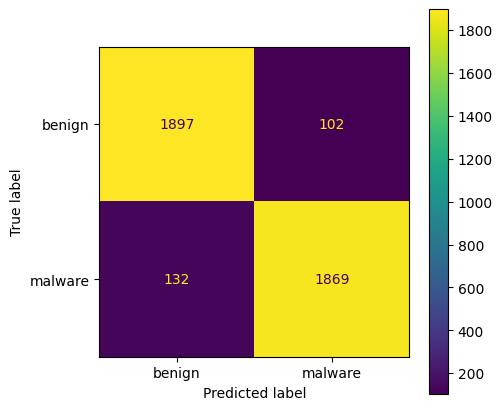

In [60]:
# Let's look at the confusion matrix
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=test_preds_flipped_labels, ax=ax, display_labels=['benign', 'malware'])

Takeaways from the confusion matrix:  
* Above, we see we have 134 false negatives, these are samples that were not detected by our ML system 
* 1869 that were considered as true positive   
* 1897 samples were correctly classified as negative   
* 102 negative samples classified as malware (false positives) 
* 132 malware samples classified as benign (false negatives)


In this section we saw how through flipping the model labels a threat actor may be able to classified malware as benign and benign as malware. 

Realistically, we could have gone through this and be even more nefarious and flip all the 1 labels to 0 and all the 0 labels to 1. Assuming 0 means benign and 1 means malware, you can see the havoc this could cause to our system. Hence the reason why we need to protect our training data.

That is it for label flipping. 

### Lab Takeaway. 
- We were able to perform simple label flipping 
- Got an introduction to the classification report
- Got an introduction to the confusion matrix 
- Recognize that our change slightly affected our model's accuracy